In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df=pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [4]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [7]:
df=df.drop(index=[105,106])

In [11]:
df.columns=['Month','SalesperMonth']

In [13]:
df.head()

,Month,SalesperMonth
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [19]:
df.set_index('Month',inplace=True)

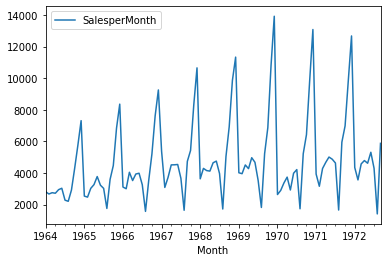

In [21]:
df.plot()

In [26]:
model=sm.tsa.statespace.SARIMAX(df['SalesperMonth'],order=(1,0,0),seasonal_order=(1,1,1,12))
result=model.fit()

c:\users\satyam gupta\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
df['forecast']=result.predict(start=70,end=103,dynamic=True)

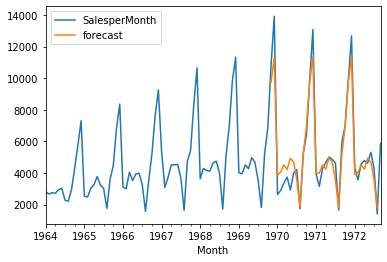

In [35]:
df[['SalesperMonth','forecast']].plot()

In [36]:
from pandas.tseries.offsets import DateOffset

In [37]:
future_date=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [52]:
future_dataset=pd.DataFrame(index=future_date[1:],columns=df.columns)

In [53]:
to_predict_data=pd.concat([df,future_dataset])

In [63]:
to_predict_data['forecast']=result.predict(start=104,end=190,dynamic=True)

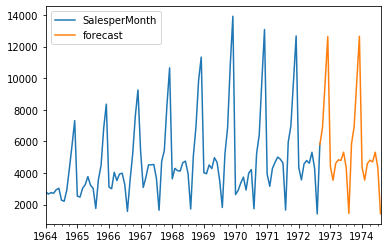

In [64]:
to_predict_data[['SalesperMonth','forecast']].plot()